In [1]:
# 必要なものをインポート
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [ ]:
# Google Driveをマウント
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# CSVファイルを読み込む
base_path = '/content/drive/MyDrive/prokenA/'
file_path = 'week1/data/animals.csv'                     # 'Appendix/youtuber.csv'または'Appendix/animals_m.csv'
dataset = pd.read_csv(base_path+file_path, index_col=0)

# データセットの確認
print(dataset)


            Height  Lifespan
Human          170        60
Chinpanzee     140        50
Duck           100        10
Eagle          120        18
Turu           130        25
Tuna           300        20
Shark          400        30


In [3]:
# データの正規化
is_scale = True  # 正規化しない：False、正規化する：True
if is_scale:
    dataset = (dataset - dataset.mean()) / dataset.std()

# 再度データセットの確認
print(dataset)

              Height  Lifespan
Human      -0.216395  1.632928
Chinpanzee -0.483707  1.080730
Duck       -0.840123 -1.128061
Eagle      -0.661915 -0.686303
Turu       -0.572811 -0.299764
Tuna        0.941956 -0.575863
Shark       1.832995 -0.023666


In [4]:
# データ間の距離を定義する
data_dist_method = "euclidean"     # ユークリッド距離
# data_dist_method = "cityblock"     # マンハッタン距離
# data_dist_method = "chebyshev"     # 最大距離

In [5]:
# 距離行列を計算する
distance_matrix = pdist(dataset, metric=data_dist_method)

In [6]:
# クラスター間の距離の計算方法を定義する
cluster_dist_method = "single"    # 最小距離法
# cluster_dist_method = "complete"  # 最大距離法
# cluster_dist_method = "average"   # 群平均法

# 距離行列からクラスター分析を行う
cl_result = linkage(distance_matrix, method=cluster_dist_method)

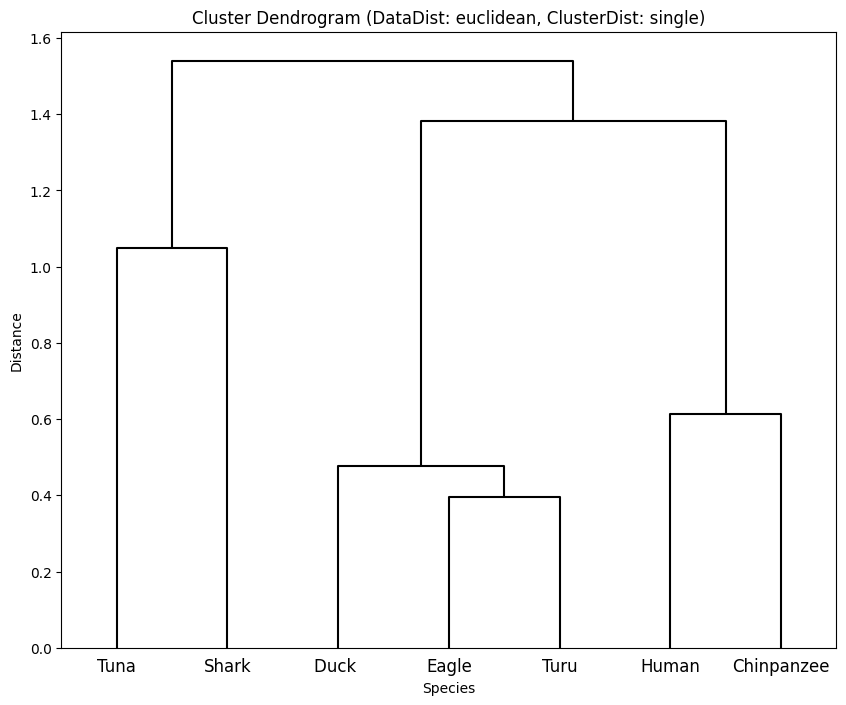

In [7]:
# クラスター分析結果の系統樹を出力する(画像形式で保存)
plt.figure(figsize=(10, 8))
dendrogram(cl_result, labels=dataset.index, orientation='top', link_color_func=lambda x: 'black')
plt.title(f'Cluster Dendrogram (DataDist: {data_dist_method}, ClusterDist: {cluster_dist_method})')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.savefig(f'{base_path}week1/result/cl_scale_{is_scale}_dtdis_{data_dist_method}_cldis_{cluster_dist_method}.png')  # 画像形式で保存
plt.show()


In [8]:
# 距離行列の保存
distance_matrix_df = pd.DataFrame(squareform(distance_matrix), index=dataset.index, columns=dataset.index)
distance_matrix_df.to_csv(f'{base_path}/result/distance_matrix_scale_{is_scale}_{data_dist_method}.csv')